In [1]:
# from STProfiler.image.foci_detection import *
from STProfiler.feature.feature_extraction import *

In [2]:
from skimage.io import imread
import pandas as pd
import numpy as np
from os import listdir
from os.path import join, isfile
from scipy.ndimage import zoom


In [4]:
tif_path = 'E:\OneDrive - Indiana University\jing research\diabetes\PDL MX1\channels\TIFF files-3Days'
rna_det_path = 'E:\OneDrive - Indiana University\jing research\diabetes\PDL MX1/results\TIFF files-3Days'
cell_label_path = 'E:\OneDrive - Indiana University\jing research\diabetes\PDL MX1/results\TIFF files-3Days\expanded_labels'
mask_label_path = 'E:\OneDrive - Indiana University\jing research\diabetes\PDL MX1\masks/new\TIFF files-3Days'

In [5]:
onlyfile = [s for s in listdir(rna_det_path) if isfile(join(rna_det_path, s))]

In [6]:
onlyfile = [s for s in onlyfile if 'C1' in s]

In [7]:
filename = onlyfile[0][:-11]

In [8]:
rna_det = pd.read_csv(join(rna_det_path, filename + '-C1-det.csv'))
nuc_label_mask = zoom(np.array(imread(join(mask_label_path, filename + '_nuc_label_processed.tif'))), zoom=2, order=0)
cell_label_mask = np.array(imread(join(cell_label_path, filename + '_label.tif')))

In [9]:
sc_feature_df = single_foci_feature(rna_det, nuc_label_mask, cell_label_mask, create_points_dist())
sc_feature_avg_df = sc_feature_df.drop(columns=['x','y']).groupby('cell').mean()

rH_df = ripleyH_feature(rna_det, cell_label_mask, ripleyH_create_plane(), use_edge_correction=True)
rH_feature_df = rH_feature_avg(rH_df)
rH_extr_feature_df = rH_extrema_feature(rH_df)

bound_inner_df, bound_outer_df =  bound_feature(rna_det, nuc_label_mask, cell_label_mask)
bound_inner_feature_df = bound_feature_avg(bound_inner_df, inner=True)
bound_outer_feature_df = bound_feature_avg(bound_outer_df, inner=False)

rdi_features_df = RDI_features(rna_det, cell_label_mask)

In [10]:
all_features_df = pd.concat([sc_feature_avg_df,
                             rH_feature_df.set_index('cell'),
                             rH_extr_feature_df.set_index('cell'),
                             bound_inner_feature_df.set_index('cell'),
                             bound_outer_feature_df.set_index('cell'),
                             rdi_features_df.set_index('cell')], axis=1, join='inner')

In [11]:
all_features_df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,bound outer num 70,bound outer num 75,bound outer num 80,bound outer num 85,bound outer num 90,bound outer num 95,bound outer num 100,PI,DI,PDI
cell,,,,,,,,,,,,,,,,,,,,,
4.0,41.125000,115.975351,115.674177,49.500000,70.187500,93.062500,106.312500,154.500000,215.125000,0.007812,...,3.0,3.0,3.0,3.0,3.8,4.0,4.0,2.143110,0.931871,0.995200
5.0,94.560000,103.558224,98.913368,42.880000,55.520000,63.440000,91.440000,139.680000,185.240000,0.009600,...,4.0,4.0,4.6,5.0,5.0,5.0,5.0,4.117654,0.465173,0.620068
6.0,58.379310,103.572620,107.220059,47.241379,57.655172,76.517241,103.206897,146.206897,201.586207,0.000000,...,9.0,9.2,10.0,10.2,11.0,11.0,11.0,0.378576,0.768191,0.769991
7.0,54.826087,105.870928,111.811537,57.869565,72.652174,81.478261,98.000000,151.260870,212.478261,0.000000,...,5.6,6.0,6.0,6.0,6.0,6.4,7.0,0.084432,0.800995,0.801085
10.0,45.969697,166.642259,166.082037,54.212121,86.727273,96.909091,137.393939,215.242424,282.151515,0.001837,...,10.0,10.0,11.0,11.0,12.2,13.0,13.0,3.151732,1.066189,1.175771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78.0,63.250000,121.454148,124.884953,56.964286,72.142857,95.750000,114.214286,169.821429,224.500000,0.000000,...,10.0,11.4,12.6,14.8,16.0,16.8,17.0,1.698010,0.880029,0.916537
79.0,63.384615,84.902267,100.712827,32.923077,53.846154,53.846154,85.153846,129.769231,161.538462,0.011834,...,4.0,4.0,5.2,6.8,7.0,7.0,7.0,2.994651,0.686402,0.821114
80.0,38.388889,96.718188,84.366304,41.055556,52.444444,62.111111,81.444444,114.222222,167.166667,0.000000,...,6.0,6.0,6.0,6.0,6.6,8.0,8.0,4.793768,0.627214,0.945856


In [13]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
#     values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [12]:
filename

'MAX_LCMV-BMS-945918-2R-STAT1-CXCL10-INS-DAPI-2-Airyscan Processing-02'

In [14]:
new_feature_path = join('E:\OneDrive - Indiana University\jing research\diabetes\PDL MX1/features 1221')

In [15]:
ripley_path = join(new_feature_path, 'ripley', 'TIFF files-3Days')
features_path = join(new_feature_path, 'features', 'TIFF files-3Days')
RDI_path = join(new_feature_path, 'RDI features', 'TIFF files-3Days')

In [18]:
c = 'C1'
filename_c = filename + '_' + c

In [19]:
ripley = pd.read_csv(join(ripley_path, filename + '_rH_' + c + '_wEd.csv'))
bounds_inner_num = pd.read_csv(join(features_path, filename_c + '_boundary_nuc_inner_num.csv'))
# bounds_inner_per = pd.read_csv(join(features_path, filename_c +'_boundary_nuc_inner_perc.csv'))
bounds_outer_num = pd.read_csv(join(features_path, filename_c +'_boundary_nuc_outer_num.csv'))
# bounds_outer_per = pd.read_csv(join(features_path, filename_c +'_boundary_nuc_outer_perc.csv'))
RDI_df = pd.read_csv(join(RDI_path, filename_c + '_RDI feautres.csv'))
foci_features = pd.read_csv(join(features_path, filename_c + '-features.csv'))

In [42]:
join(features_path, filename_c + '_boundary_nuc_inner_num.csv')

'E:\\OneDrive - Indiana University\\jing research\\diabetes\\PDL MX1/features 1221\\features\\TIFF files-3Days\\MAX_LCMV-BMS-945918-2R-STAT1-CXCL10-INS-DAPI-2-Airyscan Processing-02_C1_boundary_nuc_inner_num.csv'

: 

In [30]:
cells = pd.DataFrame()
for l in np.unique(cell_label_mask):

    if((l not in ripley['cell'].values) or
        (l not in bounds_inner_num['cell'].values) or
    #    (l not in bounds_inner_per['cell'].values) or
        (l not in bounds_outer_num['cell'].values) or
    #    (l not in bounds_outer_per['cell'].values) or
        (l not in RDI_df['cell'].values)):
        continue

    rH = np.array(ripley[ripley['cell'] == l])[0]
    bound_inner_num = np.array(bounds_inner_num[bounds_inner_num['cell'] == l])[0]
    bound_outer_num = np.array(bounds_outer_num[bounds_outer_num['cell'] == l])[0]

    rH_smooth = savitzky_golay(rH, 9, 4)

    cell = pd.Series()

    rna_det_cell = rna_det[rna_det['label'] == l]
    rna_det_cell_nuc = rna_det_cell[rna_det_cell['at nucleus']]
    rna_det_cell_cyto = rna_det_cell[rna_det_cell['at nucleus']==False]

    cell['cell label'] = l

    cell['rH 5'] = rH[:5].mean()
    cell['rH 10'] = rH[5:10].mean()
    cell['rH 15'] = rH[10:15].mean()
    cell['rH 20'] = rH[15:20].mean()
    cell['rH 25'] = rH[20:25].mean()
    cell['rH 30'] = rH[25:30].mean()
    cell['rH 35'] = rH[30:35].mean()
    cell['rH 40'] = rH[35:40].mean()
    cell['rH 45'] = rH[40:45].mean()
    cell['rH 50'] = rH[45:50].mean()
    cell['rH 55'] = rH[50:55].mean()
    cell['rH 60'] = rH[55:60].mean()
    cell['rH 65'] = rH[60:65].mean()
    cell['rH 70'] = rH[65:70].mean()
    cell['rH 75'] = rH[70:75].mean()
    cell['rH 80'] = rH[75:80].mean()
    cell['rH 85'] = rH[80:85].mean()
    cell['rH 90'] = rH[85:90].mean()
    cell['rH 95'] = rH[90:95].mean()
    cell['rH 100'] = rH[95:100].mean()
    cell['rH max loc'] = np.ndarray.argmax(rH_smooth[:-50])
    cell['rH min loc'] = np.ndarray.argmin(rH_smooth[:-50])
    cell['rH diff max loc'] = np.ndarray.argmax(np.diff(rH_smooth)[:-50])
    cell['rH diff min loc'] = np.ndarray.argmin(np.diff(rH_smooth)[:-50])

    cell['bound_inner_num 5'] = bound_inner_num[:5].mean()
    cell['bound_inner_num 10'] = bound_inner_num[5:10].mean()
    cell['bound_inner_num 15'] = bound_inner_num[10:15].mean()
    cell['bound_inner_num 20'] = bound_inner_num[15:20].mean()
    cell['bound_inner_num 25'] = bound_inner_num[20:25].mean()
    cell['bound_inner_num 30'] = bound_inner_num[25:30].mean()
    cell['bound_inner_num 35'] = bound_inner_num[30:35].mean()
    cell['bound_inner_num 40'] = bound_inner_num[35:40].mean()
    cell['bound_inner_num 45'] = bound_inner_num[40:45].mean()
    cell['bound_inner_num 50'] = bound_inner_num[45:50].mean()
    cell['bound_inner_num 55'] = bound_inner_num[50:55].mean()
    cell['bound_inner_num 60'] = bound_inner_num[55:60].mean()
    cell['bound_inner_num 65'] = bound_inner_num[60:65].mean()
    cell['bound_inner_num 70'] = bound_inner_num[65:70].mean()
    cell['bound_inner_num 75'] = bound_inner_num[70:75].mean()
    cell['bound_inner_num 80'] = bound_inner_num[75:80].mean()
    cell['bound_inner_num 85'] = bound_inner_num[80:85].mean()
    cell['bound_inner_num 90'] = bound_inner_num[85:90].mean()
    cell['bound_inner_num 95'] = bound_inner_num[90:95].mean()
    cell['bound_inner_num 100'] = bound_inner_num[95:100].mean()

    cell['bound_outer_num 5'] = bound_outer_num[:5].mean()
    cell['bound_outer_num 10'] = bound_outer_num[5:10].mean()
    cell['bound_outer_num 15'] = bound_outer_num[10:15].mean()
    cell['bound_outer_num 20'] = bound_outer_num[15:20].mean()
    cell['bound_outer_num 25'] = bound_outer_num[20:25].mean()
    cell['bound_outer_num 30'] = bound_outer_num[25:30].mean()
    cell['bound_outer_num 35'] = bound_outer_num[30:35].mean()
    cell['bound_outer_num 40'] = bound_outer_num[35:40].mean()
    cell['bound_outer_num 45'] = bound_outer_num[40:45].mean()
    cell['bound_outer_num 50'] = bound_outer_num[45:50].mean()
    cell['bound_outer_num 55'] = bound_outer_num[50:55].mean()
    cell['bound_outer_num 60'] = bound_outer_num[55:60].mean()
    cell['bound_outer_num 65'] = bound_outer_num[60:65].mean()
    cell['bound_outer_num 70'] = bound_outer_num[65:70].mean()
    cell['bound_outer_num 75'] = bound_outer_num[70:75].mean()
    cell['bound_outer_num 80'] = bound_outer_num[75:80].mean()
    cell['bound_outer_num 85'] = bound_outer_num[80:85].mean()
    cell['bound_outer_num 90'] = bound_outer_num[85:90].mean()
    cell['bound_outer_num 95'] = bound_outer_num[90:95].mean()
    cell['bound_outer_num 100'] = bound_outer_num[95:100].mean()

    cell['PI'] = RDI_df[RDI_df['cell'] == l]['PI'].values[0]
    cell['DI'] = RDI_df[RDI_df['cell'] == l]['DI'].values[0]
    cell['PDI'] = RDI_df[RDI_df['cell'] == l]['RDI'].values[0]
    
    foci_features_cell = foci_features[foci_features['label'] == l]

    foci_features_cell_mean = foci_features_cell.mean().drop(labels=['Unnamed: 0', 'label', 'x', 'y'])

    cell = pd.concat([cell, foci_features_cell_mean], axis=0)

    cells = pd.concat([cells, cell], axis=1)

cells = cells.T
cells = cells.set_index('cell label')

In [40]:
from os import getcwd
from os.path import join

In [41]:
cells.to_csv(join(getcwd(), 'old_features.csv'))
all_features_df.to_csv(join(getcwd(), 'new_features.csv'))

In [6]:
tif_rna = np.array(imread(join(tif_path, onlyfile[0])))

In [14]:
rna_df = rna_detection(tif_rna, 
                       min_sig=1,
                       max_sig=5,
                       num_sig=5,
                       thres=0.001)

In [10]:
%matplotlib qt

In [15]:
plot_rna(tif_rna, rna_df)

In [3]:
rH_path = 'E:/OneDrive - Indiana University/jing research/diabetes/PDL MX1/ripley/TIFF files-7Days'

In [4]:
onlyfile_rH = [s for s in listdir(rH_path) if isfile(join(rH_path, s))]

In [5]:
test_rH = pd.read_csv(join(rH_path, onlyfile_rH[0]))

In [6]:
test_rH

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,cell
0,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-0.211559,-0.565298,-1.245175,-1.631367,-1.542039,-2.095863,-2.087602,-2.713317,-2.667844,19
1,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,5.489943,4.489943,...,15.616904,15.415059,15.934244,15.676060,14.676060,13.676060,12.676060,11.676060,12.090326,24
2,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,17.458206,17.529104,17.638276,16.638276,16.935568,15.935568,14.935568,15.001096,14.001096,29
3,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-1.313339,-0.969496,-0.173490,0.011813,-0.988187,-1.988187,-1.673876,-1.559825,-2.559825,31
4,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-1.144356,-0.988150,-1.988150,-1.160261,-1.446364,-1.767294,-2.767294,-3.767294,-3.428945,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-46.101386,-47.101386,-48.101386,-49.101386,-50.101386,-40.547879,-41.547879,-42.547879,-43.547879,107
70,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-141.000000,-142.000000,-143.000000,-144.000000,-145.000000,-146.000000,-147.000000,-148.000000,-149.000000,108
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
72,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.000000,-9.000000,...,-141.000000,-142.000000,-143.000000,-144.000000,-145.000000,-146.000000,-147.000000,-148.000000,-149.000000,110


In [7]:
interval = 5

In [8]:
H_tot = test_rH

In [9]:
rH_features = rH_feature_avg(H_tot)

In [10]:
rH_features

,rH 5,rH 10,rH 15,rH 20,rH 25,rH 30,rH 35,rH 40,rH 45,rH 50,...,rH 110,rH 115,rH 120,rH 125,rH 130,rH 135,rH 140,rH 145,rH 150,cell
0,-2.0,-7.000000,-12.000000,-9.107756,-6.085379,-5.640545,-2.513626,-1.982153,-1.898199,-2.570388,...,3.254354,3.601904,3.898932,2.762769,2.933498,3.266104,1.668923,-0.649530,-2.221333,19
1,-2.0,-1.604023,1.489943,2.077660,0.373147,0.616794,4.093059,7.309839,8.607573,12.542418,...,16.396963,17.838386,21.437336,19.779119,18.273326,17.848817,16.293770,15.702641,12.958913,24
2,-2.0,-7.000000,-12.000000,-17.000000,-4.550252,3.049743,7.763653,7.112864,7.206654,14.395320,...,22.148893,18.770870,18.434249,17.781241,16.388170,18.463208,17.092114,17.544414,15.361779,29
3,-2.0,-7.000000,-12.000000,-17.000000,-5.172950,-2.724192,-3.193382,5.870252,8.459798,9.079961,...,3.585656,3.223297,4.167922,3.537075,0.764623,0.676932,-0.275552,-0.551570,-1.753980,31
4,-2.0,-7.000000,-12.000000,-17.000000,-5.080214,4.312624,7.465428,7.141389,5.273534,6.002918,...,2.708595,-0.798261,-1.899201,0.431454,0.438098,-0.537586,-1.424962,-1.187170,-2.635438,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-2.0,-7.000000,-12.000000,-17.000000,-22.000000,-8.263740,-8.579676,-13.579676,-8.878660,-4.471894,...,-28.892917,-23.163733,-22.101386,-27.101386,-32.101386,-37.101386,-42.101386,-47.101386,-43.658580,107
70,-2.0,-7.000000,-12.000000,-17.000000,-22.000000,-27.000000,-32.000000,-37.000000,-42.000000,-47.000000,...,-107.000000,-112.000000,-117.000000,-122.000000,-127.000000,-132.000000,-137.000000,-142.000000,-147.000000,108
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
72,-2.0,-7.000000,-12.000000,-17.000000,-22.000000,-27.000000,-32.000000,-37.000000,-42.000000,-47.000000,...,-107.000000,-112.000000,-117.000000,-122.000000,-127.000000,-132.000000,-137.000000,-142.000000,-147.000000,110


: 

In [1]:
# from STProfiler.image.foci_detection import *
from STProfiler.classify.RF_classify import *
from STProfiler.classify.result_plot import *

In [2]:
from skimage.io import imread
import pandas as pd
import numpy as np
from os import listdir
from os.path import join, isfile
from scipy.ndimage import zoom

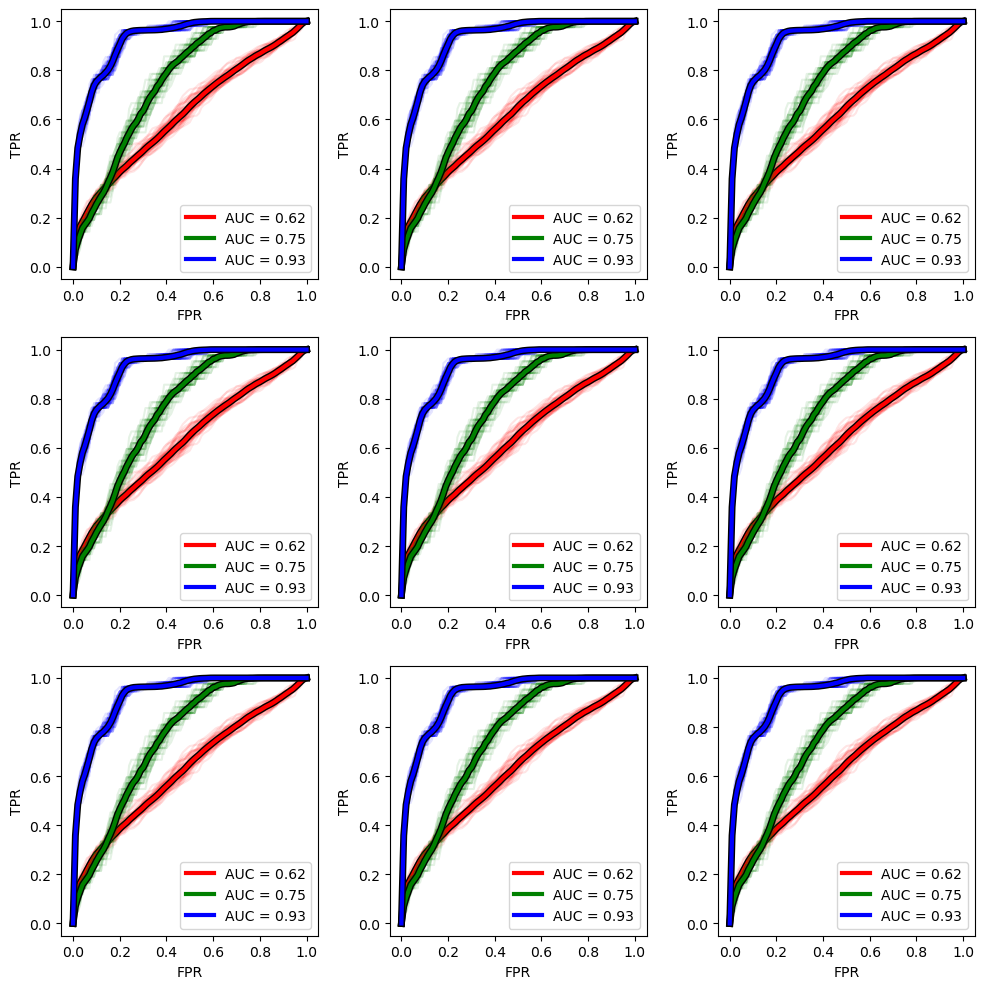

In [3]:
curr_path = 'E:/OneDrive - Indiana University/jing research/diabetes/PDL MX1/manuscript/figures/figure_data'

cond = '7v14'

tprs_morph = np.load(join(curr_path, 'morph_' + cond + '.npy'))
tprs_expr = np.load(join(curr_path, 'RF_expr_results_' + cond + '.npz'))
tprs_rf = np.load(join(curr_path, 'RF_results_20240328_' + cond + '.npz'))

fig, axs = plt.subplots(3,3, figsize=(10,10))

for ax in axs.flatten():
    ROC_plot([tprs_morph, 
            tprs_expr['tprs_pdl1'], 
            tprs_rf['tprs_pdl1']], ax, ['r', 'g', 'b'],
            plot_minor_lines=True, show_AUC=True)
    
plt.tight_layout()

In [4]:
# all_features_path = join(split(split(split(curr_path)[0])[0])[0], 'all features')
all_features_path = join('E:/OneDrive - Indiana University/jing research/diabetes/PDL MX1/all features',
                         'STP_feautres_20240328.csv')


In [5]:
all_features = pd.read_csv(all_features_path)

In [6]:
tprs_rf['ranking_pdl1']

array([0.67680489, 0.75098188, 0.87562921, 0.        , 0.08204705,
       4.10507552, 7.65813072, 8.44117835, 6.08997229, 4.11451525,
       3.07858296, 2.01821556, 1.39703812, 1.19892171, 1.00835688,
       0.77797268, 0.69731171, 0.75134963, 0.70729843, 0.74915503,
       0.77455208, 0.69497659, 0.65645019, 0.49253668, 2.44106122,
       3.00055813, 5.39592019, 0.37382489, 0.37926254, 0.51832894,
       0.52488476, 0.64769347, 0.80846254, 0.82879595, 0.96536986,
       1.05704168, 0.91096996, 1.03224245, 1.01263266, 1.05494146,
       0.90465701, 0.87432075, 0.67415021, 0.62671925, 0.56057905,
       0.53379929, 0.51905551, 0.33656731, 0.38656935, 0.34641975,
       0.30781141, 0.31099023, 0.28804183, 0.26460921, 0.2970865 ,
       0.27880774, 0.27919877, 0.3165386 , 0.31695352, 0.37425476,
       0.34946111, 0.38811096, 0.42371552, 0.41652712, 0.46853679,
       0.48634659, 0.55344127, 0.71324716, 0.78081759, 0.69533599,
       1.31343654, 0.79251551, 0.81223239, 0.72054022, 0.79505

In [7]:
features_df = all_features.drop(columns = ['cell', 'img_file', 'ins_mean', 'case', 'gene'])

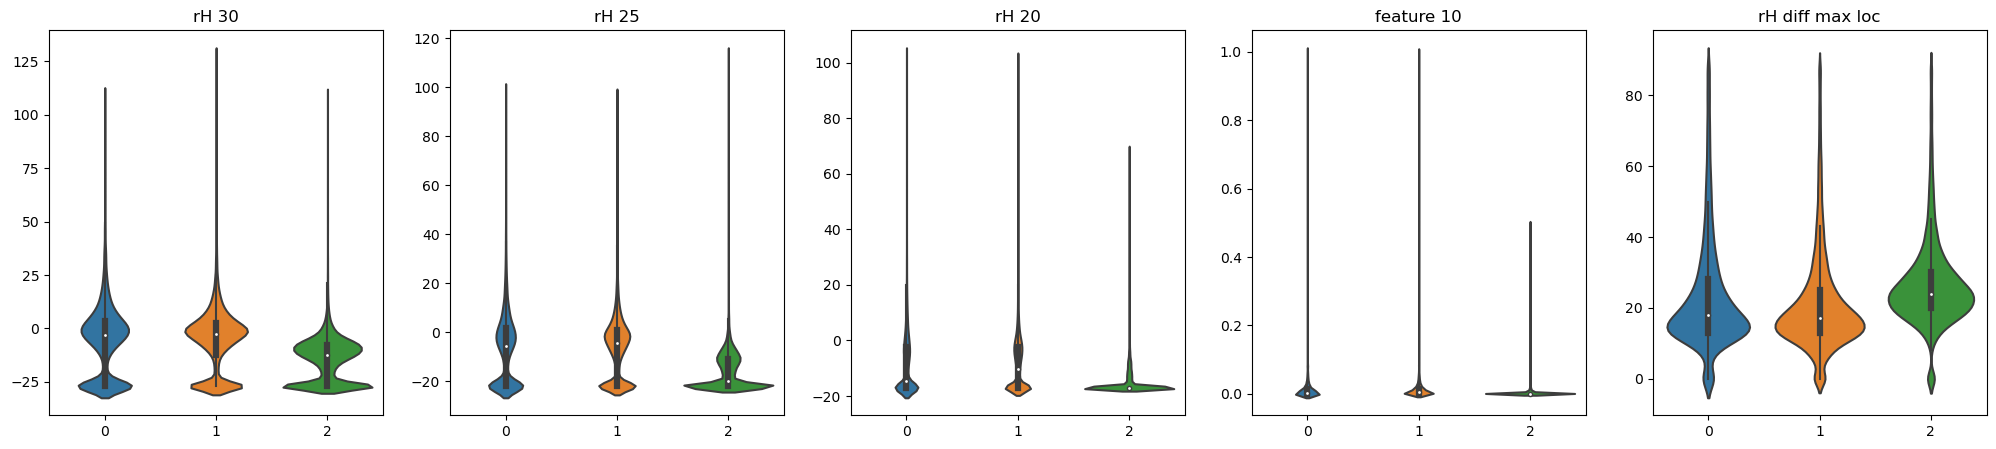

In [9]:
top_features_plot(features_df, tprs_rf['ranking_cxcl'], 5, 'days')

In [10]:
features_df.drop(columns='days').columns[np.argsort(tprs_rf['ranking_pdl1'])][(-1*5):].to_list().reverse()

In [20]:
f_list = features_df.drop(columns='days').columns[np.argsort(tprs_rf['ranking_pdl1'])][(-1*5):].to_list()

In [21]:
f_list

['rH 35', 'PDI', 'rH 25', 'DI', 'rH 30']

In [22]:
f_list.reverse()

In [23]:
f_list

['rH 30', 'DI', 'rH 25', 'PDI', 'rH 35']

In [19]:
features_df.drop(columns='days').columns[np.argsort(tprs_rf['ranking_pdl1'])][(-1*5):].to_list().reverse()

In [13]:
np.argsort(tprs_rf['ranking_pdl1'])

array([ 3,  4, 63, 64, 62, 65, 61, 66, 60, 59, 58, 57, 47, 27, 54, 56, 55,
       49, 53, 48, 50, 46, 51, 28, 52, 43, 45,  5, 44, 42, 41, 40, 78, 39,
       29, 38, 81, 82, 71, 79, 74, 77, 75, 37, 30, 80, 73, 31, 36, 72,  0,
       68, 32, 35, 69, 12, 14, 16, 15, 70, 34, 13, 17, 33, 24, 11, 26, 18,
       25, 19, 21, 22, 23, 20, 67, 76, 10,  6,  9,  2,  7,  1,  8],
      dtype=int64)